## Overview of the dataset
Here I will load the trial summary tables that include codes associated with Subjects and Activities

Subjects are grouped as follows

    SA: Adults subjects between 19 and 30 years old
    SE: Elderly people between 60 and 75 years old
    
Activities are grouped as follows

    F: Falls
    A: Activities of daily life (ADL)
    
First, let's get the summaries of that data.

In [2]:
import pandas as pd
import os

def load_summary_as_df(fname):
    df = pd.read_csv(fname, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()
    for col in df.columns:
        if df[col].dtype.kind not in 'biufc':
            df[col] = df[col].str.strip()
    df.sort_values('ID')
    return df

subjects = load_summary_as_df("Subjects.txt")
activity = load_summary_as_df("Activities.txt")

In [3]:
subjects

,ID,Age,Height,Weight,Gender
0,SA01,26,165,53.0,F
1,SA02,23,176,58.5,M
2,SA03,19,156,48.0,F
3,SA04,23,170,72.0,M
4,SA05,22,172,69.5,M
5,SA06,21,169,58.0,M
6,SA07,21,156,63.0,F
7,SA08,21,149,41.5,F
8,SA09,24,165,64.0,M
9,SA10,21,177,67.0,M


In [4]:
activity

,ID,Activity,Trials,Duration
0,D01,Walking slowly,1,100s
1,D02,Walking quickly,1,100s
2,D03,Jogging slowly,1,100s
3,D04,Jogging quickly,1,100s
4,D05,Walking upstairs and downstairs slowly,5,25s
5,D06,Walking upstairs and downstairs quickly,5,25s
6,D07,"Slowly sit in a half height chair, wait a mome...",5,12s
7,D08,"Quickly sit in a half height chair, wait a mom...",5,12s
8,D09,"Slowly sit in a low height chair, wait a momen...",5,12s
9,D10,"Quickly sit in a low height chair, wait a mome...",5,12s


Previously, I labeled the t-series datasets and saved them as pickles, so now I will reload them all available combinations of subjects and activities.

In [12]:
import glob
import numpy as np
import matplotlib.pyplot as plt

trial_dict = {}
for _s in subjects.ID:
    for _a in activity.ID:
        dpath = os.path.abspath(_s)
        fpath = os.path.join(dpath,_a)
        files = glob.glob("%s*.pkl" % fpath)
        if len(files) > 0:
            trial_dict[_s,_a] = []
            for _f in files:
                _t = os.path.split(_f)[-1].split('_')[-1].split('.')[0]
                trial_dict[_s,_a].append(_t)
            trial_dict[_s,_a].sort()
#         print(_s, _a, "has", len(trial_dict[_s,_a]), "trials")
total = 0
for key in trial_dict:
    total += len(trial_dict[key])

print("%8i unique subject-activity cases" % len(trial_dict))
print("%8i unique trials" % total)

     577 unique subject-activity cases
    2558 unique trials


Using `trial_dict` I can then count the total number of trials and access specific lists of trials for a given `trial_dict` key that is the pair of subject and activity IDs.

577 entries
2558 trials
0 entries without trials


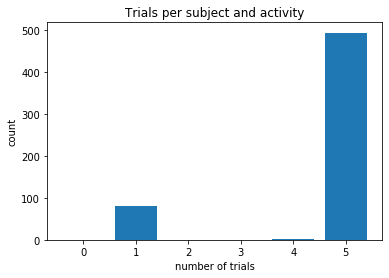

In [13]:
total = 0
notrial = 0
n_trials = [[], []]
for key in trial_dict.keys():
    _nt = len(trial_dict[key])
    total += _nt
    n_trials[0].append(_nt)
    if n_trials == 0:
        notrial += 1
print(len(trial_dict.keys()), "entries")
print(total, "trials")
print(notrial, "entries without trials")

n_trials = np.array(n_trials)
plt.hist(n_trials[0], bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5], 
         rwidth = 0.8, align='mid')
plt.title("Trials per subject and activity")
plt.xlabel("number of trials")
plt.ylabel("count")
plt.show()

We need a consistent way to get the filepath, so here's a function for that:

In [25]:
def fpath(sub,act,trial, ext='pkl'):
    _fn = "%s_%s_%s.%s" % (act,sub,trial,ext)
    _fp = os.path.abspath(sub)
    _fp = os.path.join(_fp,_fn)
    print(_fp)
    return _fp

def age_of_subject(subject_id):
    return int(subjects[subjects.ID == subject_id].Age)

def activity_str(activity_id):
    return activity.loc[activity.ID == activity_id]['Activity'].values[0]

Let's now go through and extract the data and the features just for the pitch, yaw, and roll.

In [57]:
data_set = []
for SubAct in trial_dict:
    for trial in trial_dict[SubAct]:
        df = pd.read_pickle(fpath(SubAct[0],SubAct[1],trial))
        df = df.drop(columns=['ax2','ay2','az2'])
        data_set.append(df)

# sub = 'SA03'
# act = 'D13'
# df = pd.read_pickle(fpath(sub,act,trial_dict[sub,act][0]))
# df = df.drop(columns=['ax2','ay2','az2'])

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/D01_SA01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/D02_SA01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/D03_SA01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/D04_SA01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/D05_SA01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/D05_SA01_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/D05_SA01_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/D05_SA01_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/D05_SA01_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/D06_SA01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/D06_SA01_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/F12_SA01_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/F12_SA01_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/F12_SA01_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/F12_SA01_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/F13_SA01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/F13_SA01_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/F13_SA01_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/F13_SA01_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/F13_SA01_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/F14_SA01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA01/F14_SA01_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA02/F06_SA02_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA02/F06_SA02_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA02/F07_SA02_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA02/F07_SA02_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA02/F07_SA02_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA02/F07_SA02_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA02/F07_SA02_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA02/F08_SA02_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA02/F08_SA02_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA02/F08_SA02_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA02/F08_SA02_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA03/D19_SA03_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA03/D19_SA03_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA03/D19_SA03_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA03/D19_SA03_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA03/F01_SA03_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA03/F01_SA03_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA03/F01_SA03_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA03/F01_SA03_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA03/F01_SA03_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA03/F02_SA03_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA03/F02_SA03_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA04/D15_SA04_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA04/D15_SA04_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA04/D15_SA04_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA04/D15_SA04_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA04/D15_SA04_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA04/D16_SA04_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA04/D16_SA04_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA04/D16_SA04_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA04/D16_SA04_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA04/D16_SA04_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA04/D17_SA04_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA05/D09_SA05_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA05/D09_SA05_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA05/D09_SA05_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA05/D10_SA05_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA05/D10_SA05_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA05/D10_SA05_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA05/D10_SA05_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA05/D10_SA05_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA05/D11_SA05_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA05/D11_SA05_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA05/D11_SA05_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA06/D07_SA06_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA06/D07_SA06_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA06/D07_SA06_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA06/D07_SA06_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA06/D07_SA06_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA06/D08_SA06_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA06/D08_SA06_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA06/D08_SA06_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA06/D08_SA06_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA06/D08_SA06_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA06/D09_SA06_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA06/F15_SA06_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/D01_SA07_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/D02_SA07_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/D03_SA07_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/D04_SA07_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/D05_SA07_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/D05_SA07_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/D05_SA07_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/D05_SA07_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/D05_SA07_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/D06_SA07_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/F12_SA07_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/F12_SA07_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/F12_SA07_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/F12_SA07_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/F13_SA07_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/F13_SA07_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/F13_SA07_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/F13_SA07_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/F13_SA07_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/F14_SA07_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA07/F14_SA07_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA08/F08_SA08_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA08/F09_SA08_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA08/F09_SA08_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA08/F09_SA08_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA08/F09_SA08_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA08/F09_SA08_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA08/F10_SA08_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA08/F10_SA08_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA08/F10_SA08_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA08/F10_SA08_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA08/F10_SA08_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA09/F04_SA09_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA09/F04_SA09_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA09/F04_SA09_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA09/F05_SA09_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA09/F05_SA09_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA09/F05_SA09_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA09/F05_SA09_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA09/F05_SA09_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA09/F06_SA09_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA09/F06_SA09_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA09/F06_SA09_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA10/F01_SA10_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA10/F02_SA10_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA10/F02_SA10_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA10/F02_SA10_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA10/F02_SA10_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA10/F02_SA10_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA10/F03_SA10_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA10/F03_SA10_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA10/F03_SA10_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA10/F03_SA10_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA10/F03_SA10_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA11/D18_SA11_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA11/D18_SA11_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA11/D19_SA11_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA11/D19_SA11_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA11/D19_SA11_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA11/D19_SA11_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA11/D19_SA11_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA11/F01_SA11_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA11/F01_SA11_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA11/F01_SA11_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA11/F01_SA11_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA12/D13_SA12_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA12/D13_SA12_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA12/D13_SA12_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA12/D13_SA12_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA12/D15_SA12_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA12/D15_SA12_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA12/D15_SA12_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA12/D15_SA12_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA12/D15_SA12_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA12/D16_SA12_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA12/D16_SA12_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA13/D09_SA13_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA13/D09_SA13_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA13/D10_SA13_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA13/D10_SA13_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA13/D10_SA13_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA13/D10_SA13_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA13/D10_SA13_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA13/D11_SA13_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA13/D11_SA13_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA13/D11_SA13_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA13/D11_SA13_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA14/D07_SA14_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA14/D07_SA14_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA14/D07_SA14_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA14/D07_SA14_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA14/D07_SA14_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA14/D08_SA14_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA14/D08_SA14_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA14/D08_SA14_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA14/D08_SA14_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA14/D08_SA14_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA14/D09_SA14_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA14/F14_SA14_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA14/F15_SA14_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA14/F15_SA14_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA14/F15_SA14_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA14/F15_SA14_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA14/F15_SA14_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA15/D01_SA15_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA15/D02_SA15_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA15/D03_SA15_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA15/D04_SA15_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA15/D05_SA15_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA16/D04_SA16_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA16/D05_SA16_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA16/D05_SA16_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA16/D05_SA16_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA16/D05_SA16_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA16/D05_SA16_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA16/D06_SA16_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA16/D06_SA16_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA16/D06_SA16_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA16/D06_SA16_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA16/D06_SA16_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA17/D16_SA17_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA17/D16_SA17_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA17/D16_SA17_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA17/D17_SA17_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA17/D17_SA17_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA17/D17_SA17_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA17/D17_SA17_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA17/D17_SA17_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA17/D18_SA17_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA17/D18_SA17_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA17/D18_SA17_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA19/D11_SA19_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA19/D11_SA19_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA19/D12_SA19_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA19/D12_SA19_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA19/D12_SA19_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA19/D12_SA19_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA19/D12_SA19_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA19/D13_SA19_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA19/D13_SA19_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA19/D13_SA19_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_dataset/SA19/D13_SA19_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

In [130]:
np.random.seed()

def grab_window(df, t_window=5, fps=200):
    f_window = t_window * fps
    f_start = np.random.randint(0, len(df)-f_window)
    _data = data_set[0][f_start:f_start+f_window]
    _data = _data.reset_index()
    t0 = _data['t'].values[0]
    _data['t'] = _data['t'].apply(lambda t: t - t0)
    del _data['index']
    return _data

In [131]:
len(data_set)

2558

In [153]:
clips = []
i_entry = 0
for entry in data_set:
    for i in range(5):
        clips.append(grab_window(entry).values)
        print(" Clip %5i" % i_entry, end='\r')
        i_entry += 1

In [154]:
clips = np.asarray(clips)
clips.shape

(12790, 1000, 10)

In [155]:
np.random.shuffle(clips)
np.random.shuffle(clips)
np.random.shuffle(clips)

In [207]:
signals = clips[:,:,:6].astype(np.float32)
labels = clips[:,:,7:].astype(np.int)

In [208]:
print("Signals: ", signals.shape)
print("Labels:  ", labels.shape)

Signals:  (12790, 1000, 6)
Labels:   (12790, 1000, 3)


In [209]:
import tensorflow as tf

signals = tf.convert_to_tensor(signals)
labels = tf.convert_to_tensor(labels)

ratio = 0.8
cutoff = int(len(signals)*ratio)

train_signals, train_labels = signals[:cutoff], labels[:cutoff]
test_signals, test_labels = signals[cutoff:], labels[cutoff:]

print("Train signals:", train_signals.shape)
print("Train labels: ", train_labels.shape)
print("Test signals: ", test_signals.shape)
print("Test labels:  ", test_labels.shape)

Train signals: (10232, 1000, 6)
Train labels:  (10232, 1000, 3)
Test signals:  (2558, 1000, 6)
Test labels:   (2558, 1000, 3)


In [215]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
model = models.Sequential()



model.add(layers.Conv1D(64, 3, activation='relu', input_shape=(1000, 6)))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling1D(64, 3))

model.add(layers.Conv1D(64, 3, activation='relu', input_shape=(1000, 6)))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling1D(64, 3))

model.add(layers.Conv1D(64, 3, activation='relu', input_shape=(1000, 6)))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling1D(64, 3))

model.add(layers.Dense(512, input_shape=(1920,1)))
model.add(layers.Dense(3, input_shape=(512,1)))
model.add(layers.Softmax())

In [216]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_46 (Conv1D)           (None, 998, 64)           1216      
_________________________________________________________________
batch_normalization_46 (Batc (None, 998, 64)           256       
_________________________________________________________________
re_lu_46 (ReLU)              (None, 998, 64)           0         
_________________________________________________________________
max_pooling1d_46 (MaxPooling (None, 312, 64)           0         
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 310, 64)           12352     
_________________________________________________________________
batch_normalization_47 (Batc (None, 310, 64)           256       
_________________________________________________________________
re_lu_47 (ReLU)              (None, 310, 64)         

In [217]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_signals, train_labels, epochs=10, 
                    validation_data=(test_signals, test_labels))

Epoch 1/10


ValueError: in user code:

    /home/apatch/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /home/apatch/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/apatch/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/apatch/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/apatch/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:543 train_step  **
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    /home/apatch/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:411 update_state
        metric_obj.update_state(y_t, y_p)
    /home/apatch/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/utils/metrics_utils.py:90 decorated
        update_op = update_state_fn(*args, **kwargs)
    /home/apatch/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:603 update_state
        matches = self._fn(y_true, y_pred, **self._fn_kwargs)
    /home/apatch/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:3221 categorical_accuracy
        math_ops.argmax(y_true, axis=-1), math_ops.argmax(y_pred, axis=-1)),
    /home/apatch/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:180 wrapper
        return target(*args, **kwargs)
    /home/apatch/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:1445 equal
        return gen_math_ops.equal(x, y, name=name)
    /home/apatch/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gen_math_ops.py:3224 equal
        name=name)
    /home/apatch/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:744 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /home/apatch/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/func_graph.py:595 _create_op_internal
        compute_device)
    /home/apatch/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:3327 _create_op_internal
        op_def=op_def)
    /home/apatch/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1817 __init__
        control_input_ops, op_def)
    /home/apatch/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1657 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 1000 and 6 for '{{node Equal}} = Equal[T=DT_INT64, incompatible_shape_error=true](ArgMax, ArgMax_1)' with input shapes: [?,1000], [?,6].


8/8 - 3s - loss: 0.3260 - accuracy: 0.9319


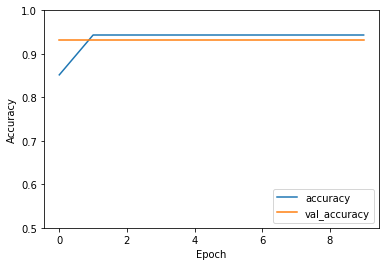

In [144]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_signals,  test_labels, verbose=2)

## Defining a container class
Here, I'll make a container for this class based on the data label.

In [ ]:
class Trials:
    
    def __init__(self, trials = [], name = None):
        if len(trials)
        self.trials = trials
        self.name = name
        
    def print_all_trials(self):
        print(self.name)
        for trial in self.trials:
            trial.print_info()
            print("\n")
    # first, gather all of the relevant files
    files = {}
    dirs = !ls | grep SA

    for dir in dirs:
        print(dir)
        files[dir] = !ls {dir}

    for dir in dirs:
        for file in files[dir]:
            _fn = "%s/%s" % (dir, file)
            if _fn.split('.')[-1] == "txt":
                print(_fn)

    pd.read_csv(_fn, header = None)

In [ ]:
ts = [t1,t2,t3]

In [ ]:
tset = Trials(ts)

In [ ]:
tset.print_all_trials()

In [ ]:
files = {}
dirs = !ls | grep SA
for dir in dirs:
    files[dir] = !ls {dir}